In [1]:
import numpy as np 
import matplotlib.pyplot as plt
def verify(src_data, dec_data):
    """
    Compare the decompressed data with original data
    :param src_data: original data, numpy array
    :param dec_data: decompressed data, numpy array
    :return: max_diff, psnr, nrmse
    """
    data_range = np.max(src_data) - np.min(src_data)
    diff = src_data - dec_data
    max_diff = np.max(abs(diff))
    # print("abs err={:.8G}".format(max_diff))
    mse = np.mean(diff ** 2)
    nrmse = np.sqrt(mse) / data_range
    psnr = 20 * np.log10(data_range) - 10 * np.log10(mse)
    return  psnr

In [38]:
odata = np.fromfile("/project/xli281_uksr/pjiao/data/hurricane_100x500x500/Wf48.bin.f32", dtype=np.float32).reshape(100, 500, 500)
ddata = np.fromfile("../build/Wf48.f32.dec", dtype=np.float32).reshape(100, 500, 500)
post_data = np.fromfile("../build/Wf48.f32.dec.compensated_data.f32", dtype=np.float32).reshape(100, 500, 500) 
error = odata - ddata 
compensation = post_data -ddata 
post_error = odata - post_data 

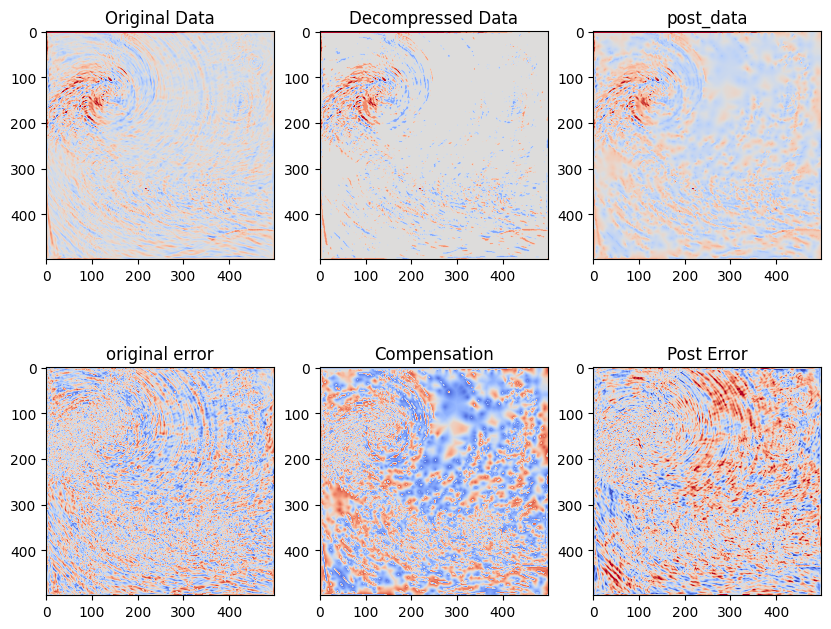

In [40]:
x =  60
y1=400 
y2 = -1
z1 = 0
z2 = 100
y1 = 0 
y2 = -1 
z1 = 0
z2 = -1

# y1 = 0 
# y2 = 200
# z1 = 0
# z2 = 200

figs,axs = plt.subplots(2, 3, figsize=(10, 8)) 
v_max = np.max(odata[x, y1:y2, z1:z2])/4
v_min = -v_max

axs[0, 0].imshow(odata[x, y1:y2, z1:z2], cmap='coolwarm', vmin=v_min, vmax=v_max)
axs[0, 0].set_title('Original Data')
axs[0, 1].imshow(ddata[x, y1:y2, z1:z2], cmap='coolwarm', vmin=v_min, vmax=v_max)
axs[0, 1].set_title('Decompressed Data')
axs[0, 2].imshow(post_data[x, y1:y2, z1:z2], cmap='coolwarm', vmin=v_min, vmax=v_max)
axs[0, 2].set_title('post_data')
e_max = np.max(error[x, y1:y2, z1:z2])
e_min = np.min(error[x, y1:y2, z1:z2])
axs[1, 0].imshow(error[x, y1:y2, z1:z2], cmap='coolwarm', vmin=e_min, vmax=e_max)
axs[1, 0].set_title('original error')
axs[1, 1].imshow(compensation[x, y1:y2, z1:z2], cmap='coolwarm', vmin=e_min, vmax=e_max)
axs[1, 1].set_title('Compensation')
axs[1, 2].imshow(post_error[x, y1:y2, z1:z2], cmap='coolwarm', vmin=e_min, vmax=e_max)
axs[1, 2].set_title('Post Error')
plt.show()

distance how 


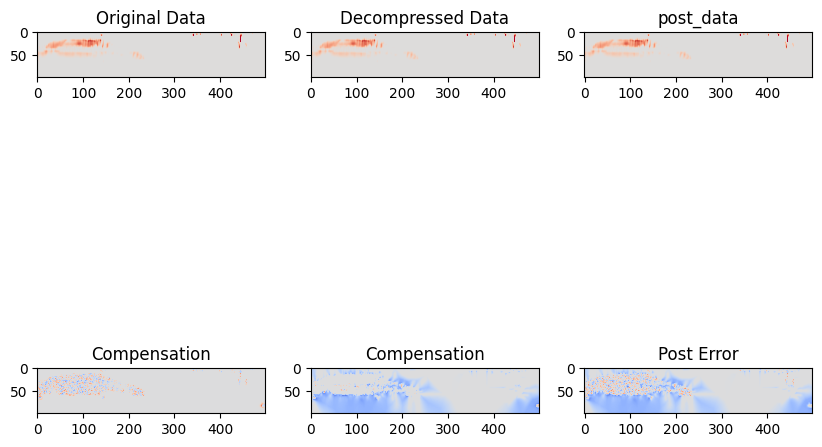

In [14]:
x =  60 
y1=0
y2 = -1 
z1 = 0
z2 = -1
figs,axs = plt.subplots(2, 3, figsize=(10, 8)) 
v_max = np.max(odata[ y1:y2,x, z1:z2])/4
v_min = -v_max

axs[0, 0].imshow(odata[ y1:y2,x, z1:z2], cmap='coolwarm', vmin=v_min, vmax=v_max)
axs[0, 0].set_title('Original Data')
axs[0, 1].imshow(ddata[ y1:y2,x, z1:z2], cmap='coolwarm', vmin=v_min, vmax=v_max)
axs[0, 1].set_title('Decompressed Data')
axs[0, 2].imshow(post_data[ y1:y2,x, z1:z2], cmap='coolwarm', vmin=v_min, vmax=v_max)
axs[0, 2].set_title('post_data')
e_max = np.max(error[ y1:y2,x, z1:z2])
e_min = np.min(error[ y1:y2,x, z1:z2])
axs[1, 0].imshow(error[ y1:y2,x, z1:z2], cmap='coolwarm', vmin=e_min, vmax=e_max)
axs[1, 0].set_title('Compensation')
axs[1, 1].imshow(compensation[ y1:y2,x, z1:z2], cmap='coolwarm', vmin=e_min, vmax=e_max)
axs[1, 1].set_title('Compensation')
axs[1, 2].imshow(post_error[ y1:y2,x, z1:z2], cmap='coolwarm', vmin=e_min, vmax=e_max)
axs[1, 2].set_title('Post Error')
plt.show()